<a href="https://colab.research.google.com/github/jahangirBuet/Evolutionary_Algorithm/blob/main/ML_Approach_Tonsil_Survivability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Final Research Work/CODE/Tonsil_updatedata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4807 non-null   object 
 1   Race recode                               4807 non-null   object 
 2   Year of diagnosis                         4807 non-null   int64  
 3   Sex                                       4807 non-null   object 
 4   Primary Site  labeled                     4807 non-null   object 
 5   ICD-O-3 Hist behav                        4807 non-null   object 
 6   Laterality                                4807 non-null   object 
 7   Site recode - rare tumors                 4807 non-null   object 
 8   AYA site recode                           4807 non-null   object 
 9   Derived AJCC T                            4807 non-null   object 
 10  Derived AJCC N                      

In [ ]:
df.describe()

,Year of diagnosis,RX Summ--Surg Prim Site,Regional nodes examined,CS tumor size,CS extension,CS lymph nodes,CS mets at dx,Survival months,Total number of benign tumors,Total number of malignant tumor,Histology ICD-O-2,Regional nodes positive,Patient ID
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4.807000e+03
mean,2010.576035,17.118369,28.568754,268.460994,353.316414,190.759101,3.422925,82.428958,0.004369,1.274392,8070.519659,61.592053,1.602947e+07
std,3.292381,16.706044,37.229532,418.593573,214.270957,185.044568,16.805942,44.864918,0.071991,0.605681,19.242100,46.033684,9.547912e+06
min,2004.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8000.000000,0.000000,1.026070e+05
25%,2008.000000,0.000000,0.000000,20.000000,150.000000,100.000000,0.000000,48.000000,0.000000,1.000000,8070.000000,2.000000,6.363275e+06
50%,2011.000000,27.000000,5.000000,32.000000,300.000000,190.000000,0.000000,77.000000,0.000000,1.000000,8070.000000,95.000000,1.779194e+07
75%,2013.000000,31.000000,47.500000,101.000000,500.000000,220.000000,0.000000,115.000000,0.000000,1.000000,8070.000000,98.000000,2.400173e+07
max,2015.000000,99.000000,99.000000,999.000000,999.000000,999.000000,99.000000,179.000000,2.000000,8.000000,8560.000000,99.000000,3.062042e+07


In [ ]:
df.isnull().sum()

Age                                         0
Race recode                                 0
Year of diagnosis                           0
Sex                                         0
Primary Site  labeled                       0
ICD-O-3 Hist behav                          0
Laterality                                  0
Site recode - rare tumors                   0
AYA site recode                             0
Derived AJCC T                              0
Derived AJCC N                              0
Derived AJCC M                              0
RX Summ--Surg Prim Site                     0
RX Summ--Surg Oth Reg                       0
Reason no cancer - directed surgery         0
Regional nodes examined                     0
CS tumor size                               0
CS extension                                0
CS lymph nodes                              0
CS mets at dx                               0
Survival months                             0
Vital status recode               

In [ ]:
df1=df

In [ ]:
df1=df1.drop(
    [
     'Patient ID',
     'Diagnostic Confirmation',
     'Combined Summary Stage',
     'Behavior code ICD-O-2',
     'SEER cause-specific death classification',
     'Survival months',
     'AYA site recode ',
     'Year of diagnosis',
     'Race recode',


'CS mets at dx', 'Histology ICD-O-2', 'RX Summ--Surg Prim Site' # Feature selection


    ],axis=1

)

In [ ]:
df1.shape

(4807, 25)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(4803, 25)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4806
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4803 non-null   object 
 1   Sex                                  4803 non-null   object 
 2   Primary Site  labeled                4803 non-null   object 
 3   ICD-O-3 Hist behav                   4803 non-null   object 
 4   Laterality                           4803 non-null   object 
 5   Site recode - rare tumors            4803 non-null   object 
 6   Derived AJCC T                       4803 non-null   object 
 7   Derived AJCC N                       4803 non-null   object 
 8   Derived AJCC M                       4803 non-null   object 
 9   RX Summ--Surg Oth Reg                4803 non-null   object 
 10  Reason no cancer - directed surgery  4803 non-null   object 
 11  Regional nodes examined       

In [ ]:
df1.columns

Index(['Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M', 'RX Summ--Surg Oth Reg',
       'Reason no cancer - directed surgery', 'Regional nodes examined ',
       'CS tumor size', 'CS extension', 'CS lymph nodes',
       'Vital status recode', 'Total number of benign tumors',
       'Total number of malignant tumor', 'Race and origin recode',
       'Regional nodes positive', 'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4806
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4803 non-null   object 
 1   Sex                                  4803 non-null   object 
 2   Primary Site  labeled                4803 non-null   object 
 3   ICD-O-3 Hist behav                   4803 non-null   object 
 4   Laterality                           4803 non-null   object 
 5   Site recode - rare tumors            4803 non-null   object 
 6   Derived AJCC T                       4803 non-null   object 
 7   Derived AJCC N                       4803 non-null   object 
 8   Derived AJCC M                       4803 non-null   object 
 9   RX Summ--Surg Oth Reg                4803 non-null   object 
 10  Reason no cancer - directed surgery  4803 non-null   object 
 11  Regional nodes examined       

In [ ]:
df1.columns

Index(['Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M', 'RX Summ--Surg Oth Reg',
       'Reason no cancer - directed surgery', 'Regional nodes examined ',
       'CS tumor size', 'CS extension', 'CS lymph nodes',
       'Vital status recode', 'Total number of benign tumors',
       'Total number of malignant tumor', 'Race and origin recode',
       'Regional nodes positive', 'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur'],
      dtype='object')

# Feature Encoding

In [ ]:
dummies=pd.get_dummies(df1[[ 'Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M',
       'RX Summ--Surg Oth Reg', 'Reason no cancer - directed surgery',


       'Race and origin recode',  'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur'

]])


In [ ]:
df1=df1.drop(

[
 'Age', 'Sex', 'Primary Site  labeled', 'ICD-O-3 Hist behav',
       'Laterality', 'Site recode - rare tumors', 'Derived AJCC T',
       'Derived AJCC N', 'Derived AJCC M',
       'RX Summ--Surg Oth Reg', 'Reason no cancer - directed surgery',


       'Race and origin recode',  'Grade', 'Histology recode  broad groupings',
       'SEER Combined Summary Stage', 'Derived AJCC Stage Group',
       'RX Summ--Scope Reg LN Sur'
],axis=1


)

In [ ]:
df1=pd.concat([df1,dummies],axis=1)

In [ ]:
df1.columns

Index(['Regional nodes examined ', 'CS tumor size', 'CS extension',
       'CS lymph nodes', 'Vital status recode',
       'Total number of benign tumors', 'Total number of malignant tumor',
       'Regional nodes positive', 'Age_20-24 years', 'Age_25-29 years',
       ...
       'Derived AJCC Stage Group_UNK Stage',
       'RX Summ--Scope Reg LN Sur_1 to 3 regional lymph nodes removed',
       'RX Summ--Scope Reg LN Sur_4 or more regional lymph nodes removed',
       'RX Summ--Scope Reg LN Sur_Biopsy or aspiration of regional lymph node, NOS',
       'RX Summ--Scope Reg LN Sur_None',
       'RX Summ--Scope Reg LN Sur_Number of regional lymph nodes removed unknown',
       'RX Summ--Scope Reg LN Sur_Sentinel lymph node biopsy',
       'RX Summ--Scope Reg LN Sur_Sentinel node biopsy and lym nd removed different times',
       'RX Summ--Scope Reg LN Sur_Sentinel node biopsy and lym nd removed same/unstated time',
       'RX Summ--Scope Reg LN Sur_Unknown or not applicable'],
      dtype=

In [ ]:
df1['Vital status recode'].value_counts()

Alive    4166
Dead      637
Name: Vital status recode, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4806
Columns: 140 entries, Regional nodes examined  to RX Summ--Scope Reg LN Sur_Unknown or not applicable
dtypes: float64(3), int64(4), object(1), uint8(132)
memory usage: 956.8+ KB


In [ ]:
def convert_months(x):
    if x=='Alive':
        return 1
    elif x=='Dead':
        return 0


df1['Vital status recode']=df1['Vital status recode'].apply(convert_months)
df1['Vital status recode'].value_counts()

1    4166
0     637
Name: Vital status recode, dtype: int64

In [ ]:
x=df1.drop(['Vital status recode'],axis=1)
y=df1['Vital status recode']

In [ ]:
from imblearn.over_sampling import SMOTE
SM=SMOTE(sampling_strategy='auto')
x, y = SM.fit_resample(x, y)
y.value_counts()

0    4166
1    4166
Name: Vital status recode, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=0,stratify=y)

In [ ]:
ytest.value_counts()

0    834
1    833
Name: Vital status recode, dtype: int64

In [ ]:
def roc_auc_values(MODEL):
  probs = MODEL.predict_proba(xtest)
  probs = probs[:, 1]
  auc = roc_auc_score(ytest, probs)
  fpr, tpr, _ = roc_curve(ytest, probs)
  a={'tpr':tpr,
     'fpr':fpr,
     'auc':auc
    }
  return a


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(xtrain,ytrain)

print('Confusion matrix is :')
cm = confusion_matrix(ytest, RF.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, RF.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',RF.score(xtest,ytest))
print("Training accuracy:",RF.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, RF.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, RF.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, RF.predict(xtest),average='macro'))
probs = RF.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
Recall=TP/(TP+FN)
print('Recall : ', Recall )
Specificy=TN/(TN+FP)
print('Specificity : ', Specificy)
precision= TP/(TP+FP)
print('Precision : ', precision)
F1_score=2*((precision*Recall)/(precision+Recall))
print('F1_score : ', F1_score)

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(RF,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
rf=roc_auc_values(RF)


Confusion matrix is :
[[759  75]
 [ 23 810]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       834
           1       0.92      0.97      0.94       833

    accuracy                           0.94      1667
   macro avg       0.94      0.94      0.94      1667
weighted avg       0.94      0.94      0.94      1667



Testing accuracy :  0.9412117576484703
Training accuracy: 100.0
F1 Score : 0.9411566811512351
Precision : 0.9429212362911266
Recall : 0.9412304490141381
AUC = 0.977
Recall :  0.9705882352941176
Specificity :  0.9152542372881356
Precision :  0.9100719424460432
F1_score :  0.9393564356435643
10 fold cross validation:  [0.59592326 0.8057554  0.97959184 0.97238896 0.97358944 0.98319328
 0.97118848 0.97959184 0.99159664 0.97478992]
Mean of 10 fold cross validation :  0.9227609029223199


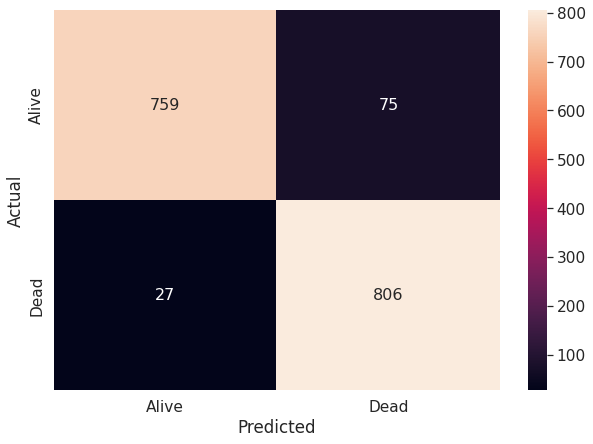

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data=[[759 , 75],
 [ 27 , 806]]

y_true = ["Dead","Alive"]
y_pred =  ["Dead","Alive"]

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, DT.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, DT.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',DT.score(xtest,ytest))
print("Training accuracy:",DT.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, DT.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, DT.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, DT.predict(xtest),average='macro'))
probs = DT.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, DT.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(DT,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
dt=roc_auc_values(DT)



Confusion matrix is :
[[745  89]
 [121 712]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       834
           1       0.89      0.85      0.87       833

    accuracy                           0.87      1667
   macro avg       0.87      0.87      0.87      1667
weighted avg       0.87      0.87      0.87      1667



Testing accuracy :  0.8740251949610078
Training accuracy: 100.0
F1 Score : 0.8739758081935345
Precision : 0.8745830125737747
Recall : 0.8740136342306707
AUC = 0.874
Sensitivity :  0.8602771362586605
Specificity :  0.8888888888888888
false positive rate :  0.1111111111111111
false negative rate :  0.1397228637413395
Negative Predictive Value :  0.8547418967587035
False Discovery rate :  0.10671462829736211
Mean Absolute Error: 0.1259748050389922
10 fold cross validation:  [0.58153477 0.76498801 0.93157263 0.89915966 0.91476591 0.93517407
 0.90396158 0.93037215 0.92436975 0.91116447]
Mean of 10 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, ABC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, ABC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',ABC.score(xtest,ytest))
print("Training accuracy:",ABC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, ABC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, ABC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, ABC.predict(xtest),average='macro'))
probs = ABC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ABC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(ABC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
abc=roc_auc_values(ABC)



Confusion matrix is :
[[740  94]
 [ 45 788]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       834
           1       0.89      0.95      0.92       833

    accuracy                           0.92      1667
   macro avg       0.92      0.92      0.92      1667
weighted avg       0.92      0.92      0.92      1667



Testing accuracy :  0.9166166766646671
Training accuracy: 91.4628657164291
F1 Score : 0.9165474854902695
Precision : 0.918049597758424
Recall : 0.9166342796111251
AUC = 0.959
Sensitivity :  0.9426751592356688
Specificity :  0.8934240362811792
false positive rate :  0.10657596371882086
false negative rate :  0.05732484076433121
Negative Predictive Value :  0.9459783913565426
False Discovery rate :  0.11270983213429256
Mean Absolute Error: 0.08338332333533294
10 fold cross validation:  [0.54556355 0.76738609 0.97358944 0.95198079 0.96638655 0.969988
 0.94957983 0.9819928  0.97358944 0.95318127]


In [ ]:
import xgboost
XGB=xgboost.XGBClassifier()
XGB.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, XGB.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, XGB.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',XGB.score(xtest,ytest))
print("Training accuracy:",XGB.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, XGB.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, XGB.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, XGB.predict(xtest),average='macro'))
probs = XGB.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, XGB.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(XGB,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
xgb=roc_auc_values(XGB)




Confusion matrix is :
[[737  97]
 [ 34 799]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       834
           1       0.89      0.96      0.92       833

    accuracy                           0.92      1667
   macro avg       0.92      0.92      0.92      1667
weighted avg       0.92      0.92      0.92      1667



Testing accuracy :  0.9214157168566287
Training accuracy: 92.63315828957239
F1 Score : 0.9213068616905311
Precision : 0.9238212490735593
Recall : 0.9214383595164684
AUC = 0.965
Sensitivity :  0.9559014267185474
Specificity :  0.8917410714285714
false positive rate :  0.10825892857142858
false negative rate :  0.04409857328145266
Negative Predictive Value :  0.9591836734693877
False Discovery rate :  0.11630695443645084
Mean Absolute Error: 0.07858428314337132
10 fold cross validation:  [0.55395683 0.77577938 0.98319328 0.96758703 0.96278511 0.97839136
 0.96398559 0.98559424 0.98319328 0.961584

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, ETC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, ETC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',ETC.score(xtest,ytest))
print("Training accuracy:",ETC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, ETC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, ETC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, ETC.predict(xtest),average='macro'))
probs = ETC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ETC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(ETC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
etc=roc_auc_values(ETC)



Confusion matrix is :
[[750  84]
 [ 27 806]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       834
           1       0.91      0.97      0.94       833

    accuracy                           0.93      1667
   macro avg       0.94      0.93      0.93      1667
weighted avg       0.94      0.93      0.93      1667



Testing accuracy :  0.9334133173365327
Training accuracy: 100.0
F1 Score : 0.9333380887996878
Precision : 0.9354344713895275
Recall : 0.933433805176747
AUC = 0.975
Sensitivity :  0.9652509652509652
Specificity :  0.9056179775280899
false positive rate :  0.09438202247191012
false negative rate :  0.03474903474903475
Negative Predictive Value :  0.9675870348139256
False Discovery rate :  0.10071942446043165
Mean Absolute Error: 0.0665866826634673
10 fold cross validation:  [0.58752998 0.79616307 0.98319328 0.97238896 0.98079232 0.97839136
 0.9759904  0.98319328 0.98679472 0.97118848]
Mean of 10

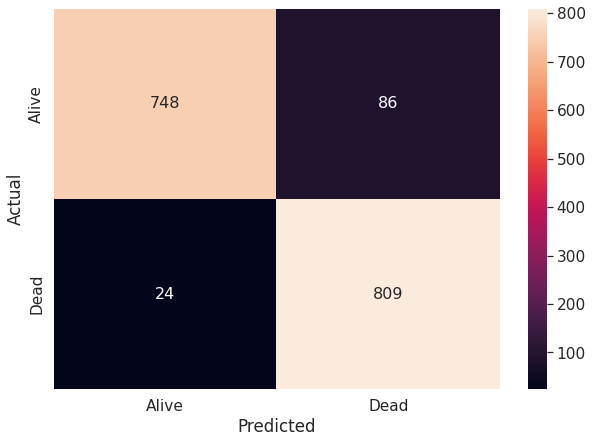

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data=[[748 , 86],
 [ 24, 809]]
y_true = ["Dead","Alive"]
y_pred =  ["Dead","Alive"]

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
GBC= GradientBoostingClassifier()
GBC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, GBC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, GBC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',GBC.score(xtest,ytest))
print("Training accuracy:",GBC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, GBC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, GBC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, GBC.predict(xtest),average='macro'))
probs = GBC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, GBC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(GBC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
gbc=roc_auc_values(GBC)




Confusion matrix is :
[[732 102]
 [ 23 810]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       834
           1       0.89      0.97      0.93       833

    accuracy                           0.93      1667
   macro avg       0.93      0.93      0.92      1667
weighted avg       0.93      0.93      0.92      1667



Testing accuracy :  0.9250149970005999
Training accuracy: 93.2483120780195
F1 Score : 0.9248504673065723
Precision : 0.9288471592889509
Recall : 0.9250433986544258
AUC = 0.965
Sensitivity :  0.9695364238410596
Specificity :  0.8881578947368421
false positive rate :  0.1118421052631579
false negative rate :  0.030463576158940398
Negative Predictive Value :  0.9723889555822329
False Discovery rate :  0.1223021582733813
Mean Absolute Error: 0.07498500299940011
10 fold cross validation:  [0.55035971 0.77218225 0.98319328 0.9759904  0.96638655 0.98079232
 0.96878752 0.98679472 0.97959184 0.96278511

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss='log')

In [ ]:
SGDC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, SGDC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, SGDC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',SGDC.score(xtest,ytest))
print("Training accuracy:",SGDC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, SGDC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, SGDC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, SGDC.predict(xtest),average='macro'))
probs = SGDC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, SGDC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(SGDC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
sgdc=roc_auc_values(SGDC)



Confusion matrix is :
[[306 528]
 [141 692]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.37      0.48       834
           1       0.57      0.83      0.67       833

    accuracy                           0.60      1667
   macro avg       0.63      0.60      0.58      1667
weighted avg       0.63      0.60      0.58      1667



Testing accuracy :  0.5986802639472105
Training accuracy: 60.55513878469617
F1 Score : 0.5759435840165361
Precision : 0.6258884365716801
Recall : 0.5988193838686554
AUC = 0.598
Sensitivity :  0.6845637583892618
Specificity :  0.5672131147540984
false positive rate :  0.43278688524590164
false negative rate :  0.31543624161073824
Negative Predictive Value :  0.8307322929171669
False Discovery rate :  0.6330935251798561
Mean Absolute Error: 0.4013197360527894
10 fold cross validation:  [0.63069544 0.65947242 0.74789916 0.72268908 0.71188475 0.68907563
 0.60984394 0.6422569  0.68067227 0.72268908

In [ ]:
from lightgbm import LGBMClassifier
LGBM=LGBMClassifier()
LGBM.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, LGBM.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, LGBM.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',LGBM.score(xtest,ytest))
print("Training accuracy:",LGBM.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, LGBM.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, LGBM.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, LGBM.predict(xtest),average='macro'))
probs = LGBM.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, LGBM.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(LGBM,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
lgbm=roc_auc_values(LGBM)



Confusion matrix is :
[[743  91]
 [ 34 799]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       834
           1       0.90      0.96      0.93       833

    accuracy                           0.93      1667
   macro avg       0.93      0.93      0.92      1667
weighted avg       0.93      0.93      0.92      1667



Testing accuracy :  0.9250149970005999
Training accuracy: 96.23405851462866
F1 Score : 0.9249302801798287
Precision : 0.9269973826153601
Recall : 0.9250354818186267
AUC = 0.967
Sensitivity :  0.9562419562419563
Specificity :  0.8977528089887641
false positive rate :  0.10224719101123596
false negative rate :  0.043758043758043756
Negative Predictive Value :  0.9591836734693877
False Discovery rate :  0.1091127098321343
Mean Absolute Error: 0.07498500299940011
10 fold cross validation:  [0.53717026 0.76378897 0.98079232 0.97478992 0.98079232 0.98679472
 0.97238896 0.98319328 0.98679472 0.969988

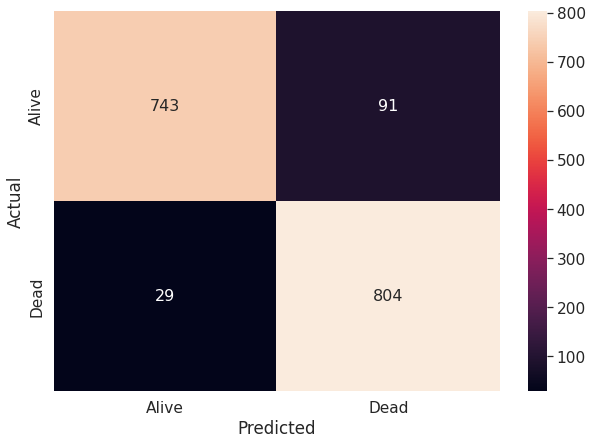

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data=[[743  ,91],
 [ 29, 804]]

y_true = ["Dead","Alive"]
y_pred =  ["Dead","Alive"]

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier()
KNNC.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, KNNC.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, KNNC.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',KNNC.score(xtest,ytest))
print("Training accuracy:",KNNC.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, KNNC.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, KNNC.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, KNNC.predict(xtest),average='macro'))
probs = KNNC.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, KNNC.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(KNNC,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
knnc=roc_auc_values(KNNC)




Confusion matrix is :
[[742  92]
 [238 595]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       834
           1       0.87      0.71      0.78       833

    accuracy                           0.80      1667
   macro avg       0.81      0.80      0.80      1667
weighted avg       0.81      0.80      0.80      1667



Testing accuracy :  0.8020395920815837
Training accuracy: 87.26181545386346
F1 Score : 0.8004881622468519
Precision : 0.8116136410896235
Recall : 0.8019869818430969
AUC = 0.885
Sensitivity :  0.7571428571428571
Specificity :  0.86608442503639
false positive rate :  0.1339155749636099
false negative rate :  0.24285714285714285
Negative Predictive Value :  0.7142857142857143
False Discovery rate :  0.11031175059952038
Mean Absolute Error: 0.19796040791841632
10 fold cross validation:  [0.7529976  0.78177458 0.83073229 0.79711885 0.80912365 0.82593037
 0.80912365 0.81752701 0.81152461 0.81632653]

In [ ]:

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(xtrain,ytrain)
print('Confusion matrix is :')
cm = confusion_matrix(ytest, GNB.predict(xtest))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
classificationReport = classification_report(ytest, GNB.predict(xtest))
print("Classification Report : ")
print (classificationReport)
print("\n")
print('Testing accuracy : ',GNB.score(xtest,ytest))
print("Training accuracy:",GNB.score(xtrain,ytrain)*100)
print("F1 Score :",f1_score(ytest, GNB.predict(xtest),average='macro'))
print("Precision :", precision_score(ytest, GNB.predict(xtest),average='macro'))
print("Recall :", recall_score(ytest, GNB.predict(xtest),average='macro'))
probs = GNB.predict_proba(xtest)
probs = probs[:, 1]
auc = roc_auc_score(ytest, probs)
fpr, tpr, _ = roc_curve(ytest, probs)
auc1=metrics.auc(fpr, tpr)
print('AUC = %.3f' % (auc1))
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, GNB.predict(xtest)))

skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(GNB,x,y,cv=skfold)
print("10 fold cross validation: ",scores)
print("Mean of 10 fold cross validation : ",np.mean(scores))
gnb=roc_auc_values(GNB)



Confusion matrix is :
[[781  53]
 [366 467]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       834
           1       0.90      0.56      0.69       833

    accuracy                           0.75      1667
   macro avg       0.79      0.75      0.74      1667
weighted avg       0.79      0.75      0.74      1667



Testing accuracy :  0.7486502699460108
Training accuracy: 73.503375843961
F1 Score : 0.7394042367756062
Precision : 0.7894918181208503
Recall : 0.7485375445142086
AUC = 0.904
Sensitivity :  0.6809067131647777
Specificity :  0.8980769230769231
false positive rate :  0.10192307692307692
false negative rate :  0.3190932868352223
Negative Predictive Value :  0.56062424969988
False Discovery rate :  0.06354916067146282
Mean Absolute Error: 0.2513497300539892
10 fold cross validation:  [0.49160671 0.70023981 0.76470588 0.74789916 0.77070828 0.74669868
 0.7334934  0.70348139 0.75030012 0.7214886 ]
Me

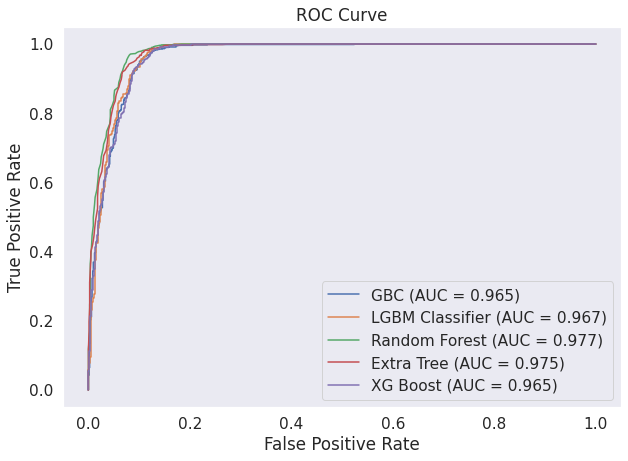

In [ ]:

plt.figure(figsize=(10,7))
plt.plot(gbc['fpr'], gbc['tpr'],   label='GBC (AUC = %0.3f)' % gbc['auc'])

plt.plot(lgbm['fpr'], lgbm['tpr'],  label='LGBM (AUC = %0.3f)' % lgbm['auc'])
plt.plot(rf['fpr'], rf['tpr'], label='Random Forest (AUC = %0.3f)' % rf['auc'])
plt.plot(etc['fpr'], etc['tpr'], label='Extra Tree (AUC = %0.3f)' % etc['auc'])

plt.plot(xgb['fpr'], xgb['tpr'], label='XG Boost (AUC = %0.3f)' % xgb['auc'])

# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.grid(False)
plt.show()